# <div align="center">Lab 7 - Ensemble Learning </div>
## <div align="center"> Elder de Sousa Whalen </div>
## <div align="right"> 10.23.2020 </div>

### Overview
Ensemble learning is the combination of different techniques in machine learning, different models, into a single predictive model in an attempt to solve a more complex problem. The idea is to create different base models, also referred to as base learners, that when combined, improve the performance accuracy of a predictive model.

Think of it when Steve Rodgers (Captain America) said ["Avengers, assemble!"](https://www.youtube.com/watch?v=fP2w_UAK6B4) He had a big problem and knew that using more than one method (Avenger) would increase the odds of solving that problem.

In this lab, 14 models are created, split in 5 different categories:
1. Baseline: Random Forest, kNN, SVC, Logistic Regression
2. Bagging: Random Forest, kNN, SVC, Logistic Regression
3. Boosting: Ada Boost, Gradient Boost, XG Boost, Ensemble
4. Stacked Model A: Random Forest, kNN, SVC, Logistic Regression into a Logistic Regression meta-classifier
5. Stacked Model B: Model with Grid Search Cross Validation hyperparameters.

The purpose of this lab is to compare the accuracy of four base models, also referred to as weak learners to the accuracy obtained after using ensemble techniques like bagging, boosting, stacked model combining all the base models and a stacked model with grid search cross validation.


### Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from mlxtend.classifier import EnsembleVoteClassifier

from xgboost import XGBClassifier

%matplotlib inline

In [19]:
# Load the wine recognition dataset
wine = load_wine()
# Convert to Pandas Dataframe
df = pd.DataFrame(data = np.c_[wine['data'], wine['target']], 
                             columns = wine['feature_names'] + ['target'])
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Exploratory Data Analysis

In [20]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [21]:
df.shape

(178, 14)

In [22]:
# Check for missing values
missing = np.isnan(df.values).any()
if ( missing == False):
    print('No missing values')
else:
    print('Oh uh. There are missing values!')

No missing values


In [23]:
X, y = df.drop(['target'], axis=1), df['target']
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
#Scale the data since we have variables with different magnitudes
x_vals = X.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x_vals)
X = pd.DataFrame(x_scaled, columns=X.columns)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Text(0.5, 1.0, 'Histogram of class in wine dataset')

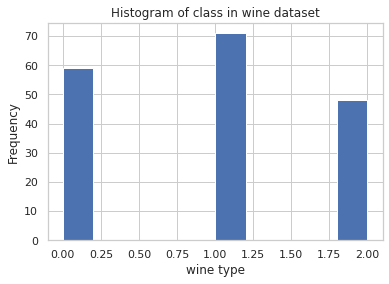

In [25]:
# Histogram of the target variable
y.hist()

# Set the title and labels
plt.xlabel("wine type")
plt.ylabel("Frequency")
plt.title("Histogram of class in wine dataset")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


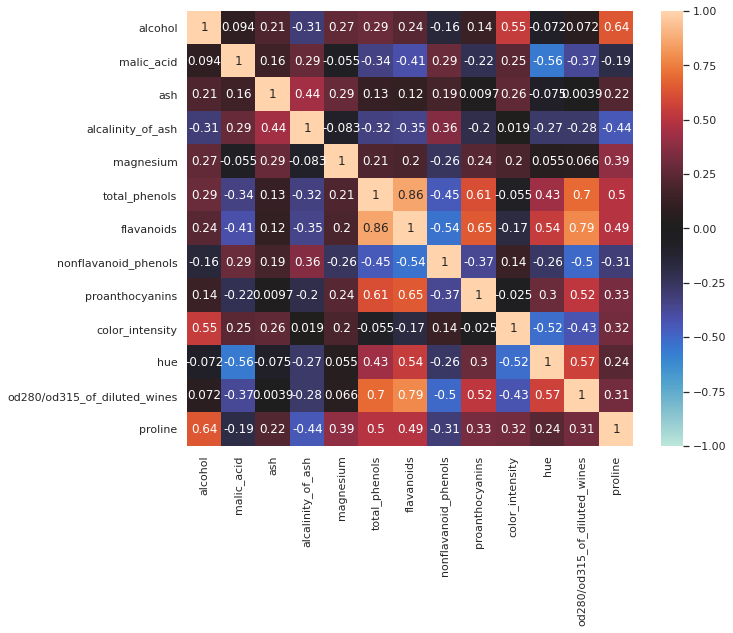

In [26]:
#Correlation matrix between the independent variables
import seaborn as sns

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,8))
corrmat = X.corr()
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);

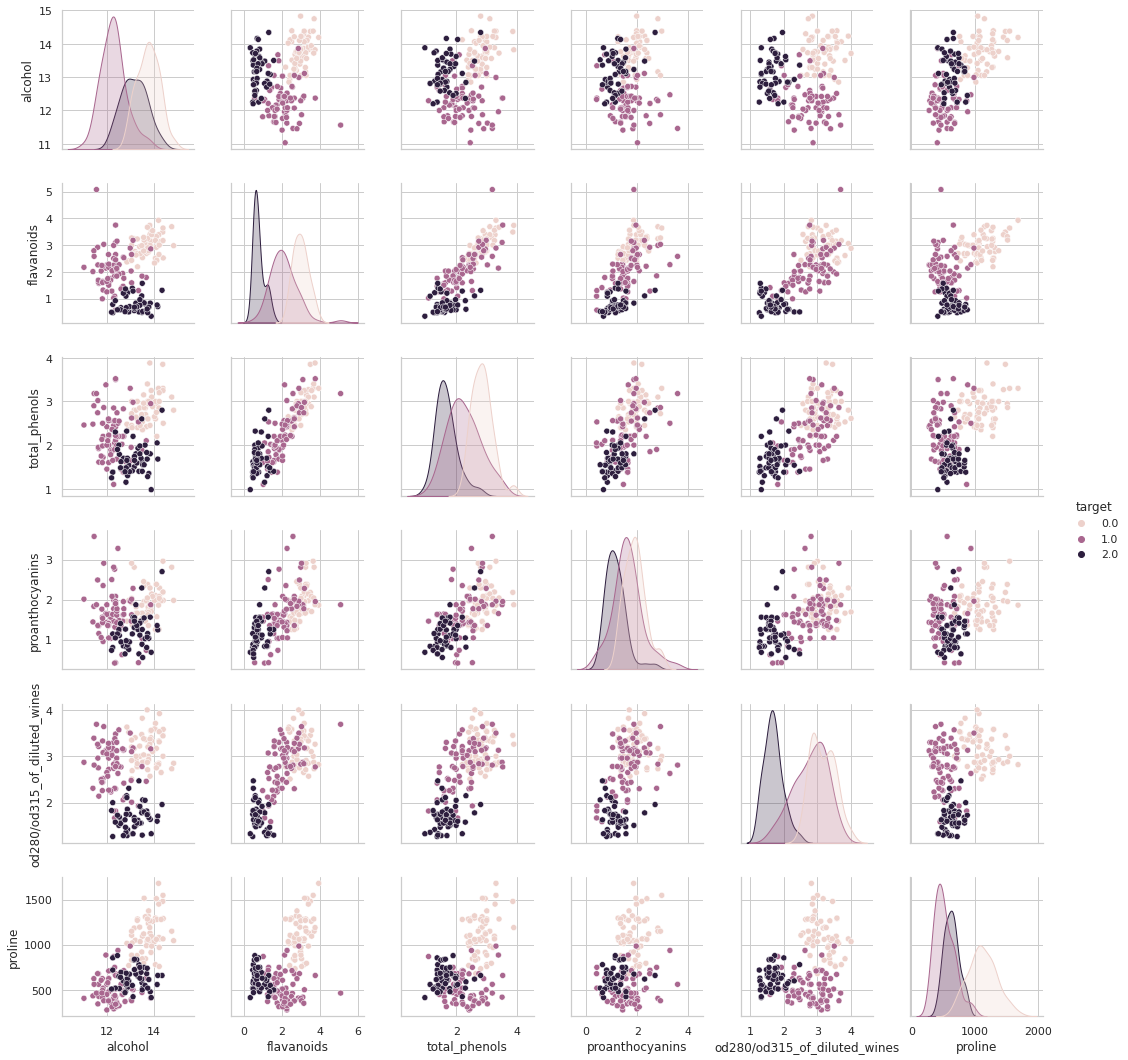

In [27]:
# Scatterplot matrix using variables that showed a correlation greater than |0.6|

sns.set_style("whitegrid");
sns.pairplot(
    df,
    vars=["alcohol", "flavanoids", "total_phenols", "proanthocyanins", 
          "od280/od315_of_diluted_wines", "proline"],
    hue="target",
)

The scatter plot above shows that for some of the variables it is possible to easity separate the three different classes present in the data set. Some combinations of variables, like total_phenols and flavanoids showed a strong linear relationship, indicating the presence of collinearity.

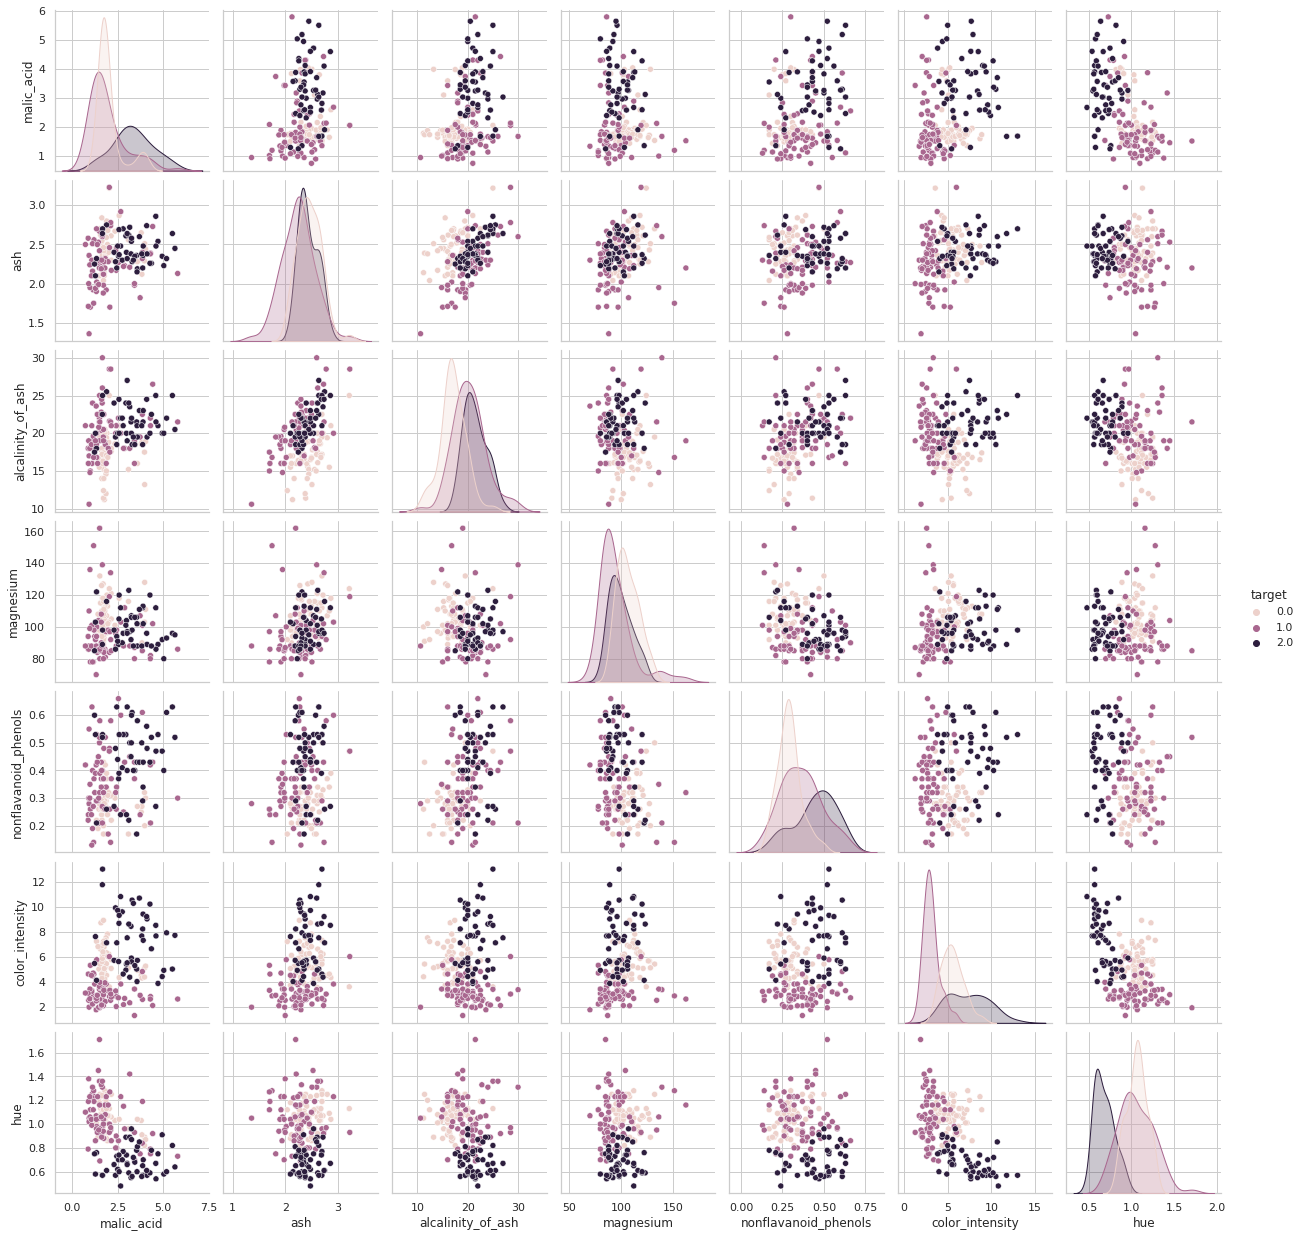

In [28]:
# Scatterplot matrix using variables that showed a correlation smaller than |0.6|

xnames=X.drop(["alcohol", "flavanoids", "total_phenols", "proanthocyanins", 
          "od280/od315_of_diluted_wines", "proline"], axis=1)

sns.set_style("whitegrid");
sns.pairplot(
    df,
    vars=xnames,
    hue="target",
)

Interestingly though, the scatter plot using variables that showed a lower correlation value than |0.6| showed that the separation of the three different classes is much harder to be observed.

### Models

#### Baseline models

* Random forest classifier - An ensemble method that operates by constructing a multitude of decision trees
* k-nearest neighbors (classification) - The output is based on the most common class of the k closest neighbors.
* Support Vector Classification (SVC) - Constructs a hyperplane or set of hyperplanes that can be used for classification, using the plane to separate the classes of data set.
* Logist regression - A regression model that can be used to model a categorical dependent variable.

In [29]:
# Code from (3)Ensemble Learning — Bagging, Boosting, Stacking and Cascading Classifiers
RANDOM_SEED = 0


#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)

knn_clf = KNeighborsClassifier(n_neighbors=3)

svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)

lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)

classifier_array = [rf_clf, knn_clf, svc_clf, lr_clf]
labels = [clf.__class__.__name__ for clf in classifier_array]

normal_accuracy = []
normal_std = []

for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]\n" % 
          (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))

Accuracy: 0.9046 (+/- 0.0442) [Normal RandomForestClassifier]

Accuracy: 0.9330 (+/- 0.0469) [Normal KNeighborsClassifier]

Accuracy: 0.9887 (+/- 0.0160) [Normal SVC]

Accuracy: 0.9720 (+/- 0.0208) [Normal LogisticRegression]



#### Bagging models

Uses bootstrapped copies of the original data set, obtained by sampling random points with replacement, used to train individual classifiers. Majority vote is used for classification models which then combines all the base classifiers into a single model to provide the final result. Bagging works on reducing high variance of models, reducing the generalization error.

In [30]:
# Code from (3)Ensemble Learning — Bagging, Boosting, Stacking and Cascading Classifiers
bagging_accuracy = []
bagging_std = []

for clf in classifier_array:
    bagging_clf = BaggingClassifier(clf, max_samples=0.7, max_features=10, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
    
    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % 
          (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.9496 (+/- 0.0271) [Bagging RandomForestClassifier]

Accuracy: 0.9496 (+/- 0.0233) [Bagging KNeighborsClassifier]

Accuracy: 0.9719 (+/- 0.0079) [Bagging SVC]

Accuracy: 0.9552 (+/- 0.0207) [Bagging LogisticRegression]



#### Boosting models

Boosting attempts to convert weak learners, that have low correlation with the true class labels, to strong ones. It trains the base learners iteratively while trying to minimize the errors made by the previous iteration. At each state, weights are assigned to a trained model. Models that performed poorly have a higher weight assigned to them so they can be focused on and improved in the next iteration. Boosting works on the generalization error by reducing the bia on models that high bias-low variance. 

In [31]:
# Code from (3)Ensemble Learning — Bagging, Boosting, Stacking and Cascading Classifiers
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier(max_depth=10, learning_rate=0.001)

ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.848, Variance: (+/-) 0.014 [Ada Boost]
Accuracy: 0.848, Variance: (+/-) 0.060 [Gradient Boost]
Accuracy: 0.871, Variance: (+/-) 0.070 [XG Boost]
Accuracy: 0.871, Variance: (+/-) 0.062 [Ensemble]


#### Stacked model A (RF, kNN, SVC, LR)

Stacking combines the predictions of multiple classifiers into one single model known as meta-classifier. Individual models are trained separately and tuned to achieve greater performance. The class labels (or probabilites) obtained by the individual classifiers are fed to the meta-classifier, which is trained based that input. In other words, the meta-classifier is trained based on the predictions made by the individual tuned models.

In [32]:
# Code from (3)Ensemble Learning — Bagging, Boosting, Stacking and Cascading Classifiers
#Base Learners
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED)

knn_clf = KNeighborsClassifier(n_neighbors=3)

svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)

lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)

lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, svc_clf, lr_clf], meta_classifier=lr)

classifier_array = [rf_clf, knn_clf, svc_clf, lr_clf, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]

acc_list = []
var_list = []

for clf, label in zip(classifier_array, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    acc_list.append(np.round(cv_scores.mean(),4))
    var_list.append(np.round(cv_scores.std(),4))
    #print("Accuracy: {} (+/- {}) [{}]".format(np.round(scores.mean(),4), np.round(scores.std(),4), label))

Accuracy: 0.9046 (+/- 0.0442) [RandomForestClassifier]
Accuracy: 0.9330 (+/- 0.0469) [KNeighborsClassifier]
Accuracy: 0.9887 (+/- 0.0160) [SVC]
Accuracy: 0.9720 (+/- 0.0208) [LogisticRegression]
Accuracy: 0.9776 (+/- 0.0158) [StackingClassifier]


#### Stacked model B - Grid Search Cross Validation hyperparameters

Grid search cross validation uses cros validation to train learners using a set of data and test it with a different set while also doing a parameter tuning, which selects the values of the parameters for a specific model that maximizes the accuracy of the model

In [34]:
# Code from (3)Ensemble Learning — Bagging, Boosting, Stacking and Cascading Classifiers
#Base Learners.
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED)
knn_clf = KNeighborsClassifier(p=2, metric='minkowski')
svc_clf = SVC(random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)
lr = LogisticRegression(random_state=RANDOM_SEED) # meta classifier

sclf = StackingClassifier(classifiers=[rf_clf, knn_clf, svc_clf, lr_clf], meta_classifier=lr)

print("\nAccuracies of all classifiers using grid search cross validation.")

params = {'randomforestclassifier__n_estimators': np.arange(10,20), 'randomforestclassifier__max_depth': np.arange(1,5), 
          'kneighborsclassifier__n_neighbors': np.arange(1,20,2),
         'svc__C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'svc__kernel':['poly', 'rbf'],
          #'logisticregression__C': [20, 200, 2000, 20000],
          'meta-logisticregression__C': [0.01,0.1,10,100,1000]}

#Any other addition to params was taking too long to conclude both on jupyter notebook and on google colab

gsearch_cv = GridSearchCV(sclf, param_grid=params, cv=5, refit=True, n_jobs=-1)
gsearch_cv.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

print('Best parameters: %s' % gsearch_cv.best_params_)
print('Accuracy: %.5f' % gsearch_cv.best_score_)



Accuracies of all classifiers using grid search cross validation.
Best parameters: {'kneighborsclassifier__n_neighbors': 7, 'meta-logisticregression__C': 0.01, 'randomforestclassifier__max_depth': 3, 'randomforestclassifier__n_estimators': 10, 'svc__C': 1.0, 'svc__kernel': 'poly'}
Accuracy: 0.99444


In [ ]:
#for param in lr.get_params().keys():
#    print(param)

### Conclusions

What was observed during this lab is that while ensemble methods are a great option to boost the accuracy of a weak learner based on single models, they may not always offer the best results when the base models are already performing well. As an example, the base SVC model had an accuracy score of 0.9887 (+/- 0.0160) while the result obtained using bagging was 0.9719 (+/- 0.0079), a lower accuracy score. Worth noting that the variance on the bagging model was also lower, which is what bagging models are used for.

On the boosting models, both the XGBClassifier and the EnsembleVoteClassifier peformed better than AdaBoostClassifier and the GradientBoostingClassifier.

The stacked models can be very powerful in improving accuracy scores. All the base models had good accuracy scores and the stacked model was still able to improve the accuracy while reducing the variability, except when compared to the SVC base model, where the accuracy score was slightly higher.

The Grid Search Cross Validation with hyperparameters has the potential to be the best, as long as the computational power available allows the method to compute the results in a timely manner. It offered the higher accuracy score but 2 hours or more may not be considered in a timely manner by many.

### References
1. https://scikit-learn.org/stable/datasets/index.html#wine-recognition-dataset
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
3. https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674
4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
5. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
6. https://en.wikipedia.org/wiki/Random_forest
7. https://en.wikipedia.org/wiki/Support_vector_machine#Definition
8. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
9. https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/